In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import seaborn as sns
sns.set()

# Trajectories (obs, actions, penalty)

In [142]:
!ls ../data/a3c

a3c_trajectories_0.csv


In [143]:
df = pd.read_csv('../data/a3c/a3c_trajectories_0.csv', delimiter=";")
df.columns = ["util_0", "power_0", "dist_0",
                "util_1", "power_1", "dist_1",
                "util_2", "power_2", "dist_2",
                "action", "penalty"]
df

ValueError: Length mismatch: Expected axis has 8 elements, new values have 11 elements

In [112]:
df.action.value_counts()

edc_2    1107
edc_0     531
edc_1     319
Name: action, dtype: int64

In [113]:
df.penalty.value_counts()

False    1940
True       17
Name: penalty, dtype: int64

In [114]:
interval = 250
for i in range(len(df)//interval):
    print(df.iloc[i*interval:(i+1)*interval]["action"].value_counts())

edc_2    144
edc_0     59
edc_1     47
Name: action, dtype: int64
edc_2    144
edc_0     63
edc_1     43
Name: action, dtype: int64
edc_2    130
edc_0     77
edc_1     43
Name: action, dtype: int64
edc_2    141
edc_0     73
edc_1     36
Name: action, dtype: int64
edc_2    133
edc_0     70
edc_1     47
Name: action, dtype: int64
edc_2    143
edc_0     73
edc_1     34
Name: action, dtype: int64
edc_2    147
edc_0     65
edc_1     38
Name: action, dtype: int64


In [115]:
scale_type = "standarization"

scale_dict = {"normalization": {"power": (58*5, 80*5),
                                "util": (0, 500),
                                "dist": (299.58, 2186.21)},
              "standarization": {"power": (361.19, 25.89),
                                 "util": (268.08, 111.47),
                                 "dist": (1088.39, 540.25)},
              "None": None
             }

def inverse_scale_data(scale_data):
        if scale_type == "normalization":
            return scale_data * (scale_pair[1] - scale_pair[0]) + scale_pair[0]
        if scale_type == "standarization":
            return scale_data * scale_pair[1] + scale_pair[0]
        return scale_data
        
scaled_col = ["util_0", "power_0", "dist_0",
              "util_1", "power_1", "dist_1",
              "util_2", "power_2", "dist_2"]

scaled_df = df.copy()
scale_pair = scale_dict[scale_type]["util"]
scaled_df[scaled_col[0::3]] = scaled_df[scaled_col[0::3]].apply(inverse_scale_data)

scale_pair = scale_dict[scale_type]["power"]
scaled_df[scaled_col[1::3]] = scaled_df[scaled_col[1::3]].apply(inverse_scale_data)

scale_pair = scale_dict[scale_type]["dist"]
scaled_df[scaled_col[2::3]] = scaled_df[scaled_col[2::3]].apply(inverse_scale_data)

In [116]:
scaled_df.describe()

,util_0,power_0,dist_0,util_1,power_1,dist_1,util_2,power_2,dist_2
count,1.957000e+03,1957.000000,1957.000000,1.957000e+03,1957.000000,1957.000000,1.957000e+03,1957.000000,1957.000000
mean,1.112928e+02,322.300520,498.912392,9.341850e+01,317.242983,1125.565826,1.952683e+02,345.591050,1640.932805
std,6.049738e+01,30.686607,121.159882,5.678517e+01,30.277548,289.429426,9.071119e+01,33.913716,351.127787
min,2.866927e-07,-49.999998,299.587171,2.866927e-07,-49.999998,686.840513,2.866927e-07,-49.999998,1020.882641
25%,6.000000e+01,312.230828,400.047844,4.000000e+01,308.307282,780.349062,1.200000e+02,339.364517,1329.256048
50%,1.200000e+02,322.519859,497.648940,1.000000e+02,319.872345,1159.676551,2.000000e+02,352.517807,1667.910912
75%,1.600000e+02,334.207184,613.067125,1.400000e+02,330.446968,1324.614726,2.600000e+02,356.510201,1984.784647
max,2.400000e+02,352.586655,685.185692,2.200000e+02,352.517807,1700.704329,5.000000e+02,402.092209,2186.212050


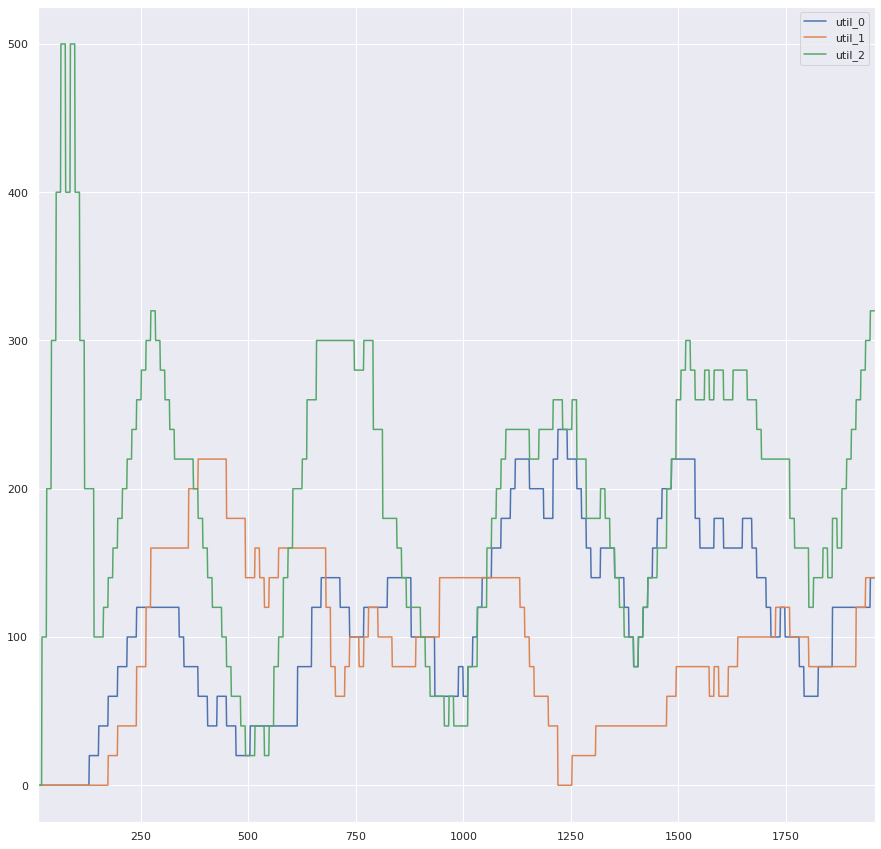

In [119]:
scaled_df.iloc[11:].plot(y=["util_0","util_1","util_2"], figsize=(15,15))

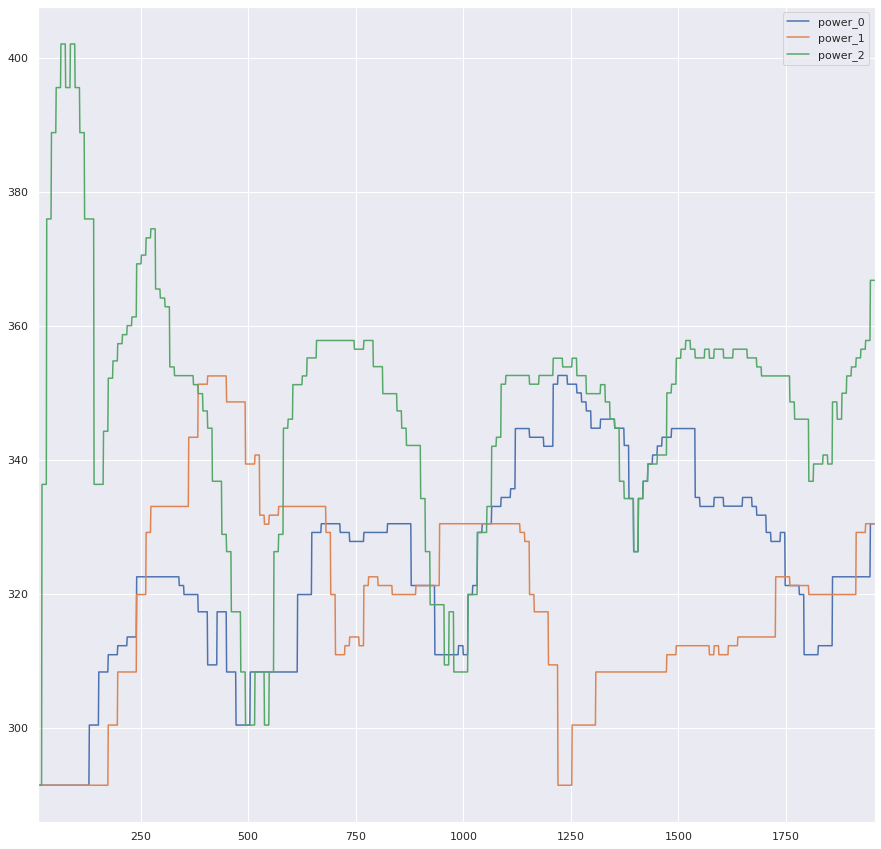

In [117]:
scaled_df.iloc[11:].plot(y=["power_0","power_1","power_2"], figsize=(15,15))

# REWARD, Q-VALUES, ETC. INFO

In [120]:
!ls ../info/

dist.txt		       vanilla_A2C_training_results.csv
mercury_info_parsed	       vanilla_a3c_training_info.txt
train_arrays.txt	       vanilla_a3c_training_results.csv
vanilla_A2C_training_info.txt


In [139]:
df_2 = pd.read_csv('../info/train_arrays.txt', delimiter=",")
df_2.columns = ["log_prob", "_", "reward", "v_vals",
                "q_vals", "entropy"]
df_2 = df_2.drop(["_"], axis=1)
df_2["log_prob"] = df_2["log_prob"].apply(lambda x: x.split("(")[1])
df_2["log_prob"] = df_2["log_prob"].astype("float64")

df_2["a_vals"] = df_2.q_vals - df_2.v_vals

df_2

,log_prob,reward,v_vals,q_vals,entropy,a_vals
0,-0.4530,58.778831,0.118960,4.033951,0.870705,3.914991
1,-0.3957,58.778831,0.079348,3.944071,0.821898,3.864724
2,-0.4187,58.778831,0.133453,3.853283,0.838387,3.719830
3,-1.3261,58.778831,0.112737,3.761577,0.875806,3.648841
4,-0.3607,58.778831,0.062726,3.668945,0.787096,3.606219
...,...,...,...,...,...,...
1938,-0.6882,3.338513,-0.001641,-2.350042,1.028947,-2.348401
1939,-0.6926,3.338513,0.021340,-2.358324,1.030446,-2.379664
1940,-0.6374,3.338513,-0.007118,-2.366689,1.005256,-2.359571
1941,-0.6736,3.338513,-0.000045,-2.375140,1.021137,-2.375095


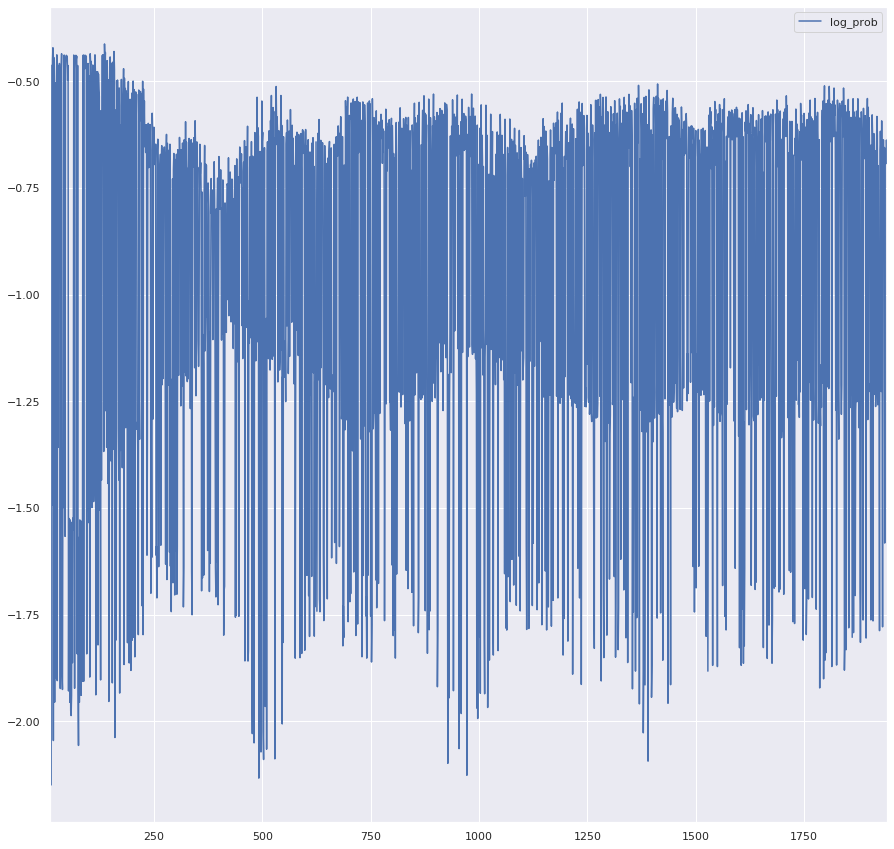

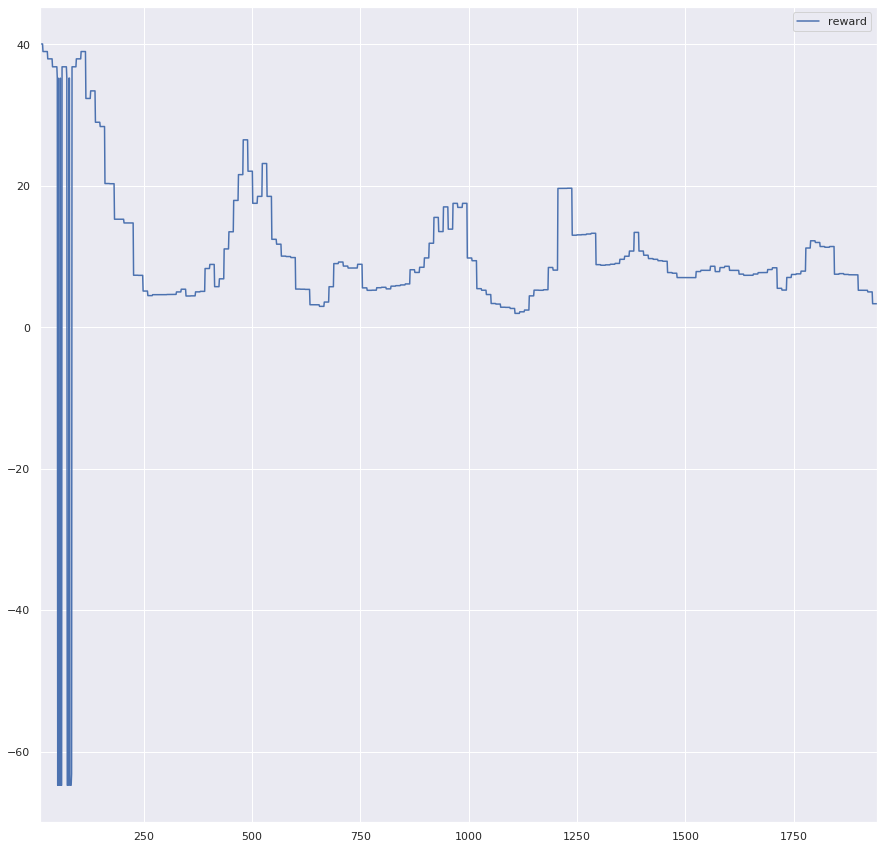

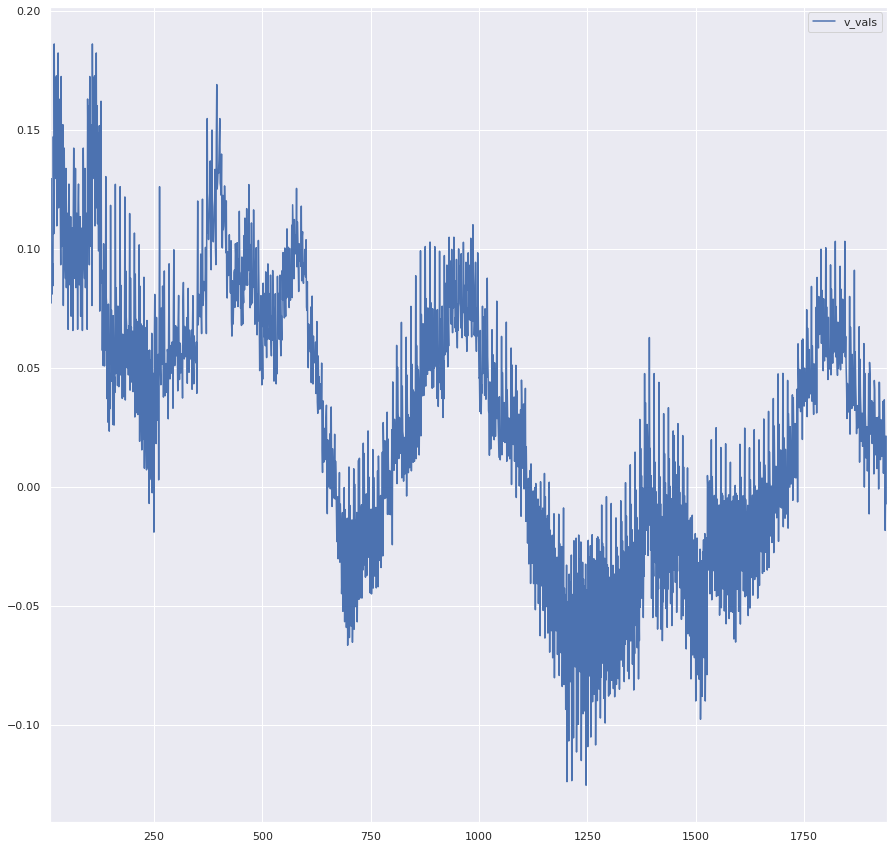

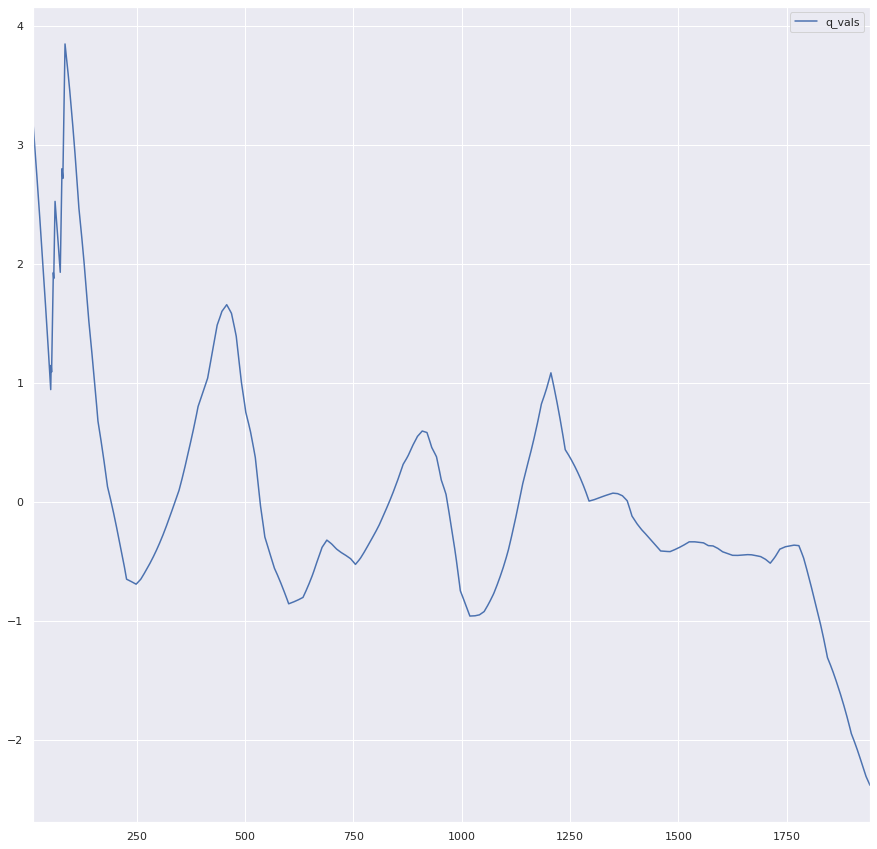

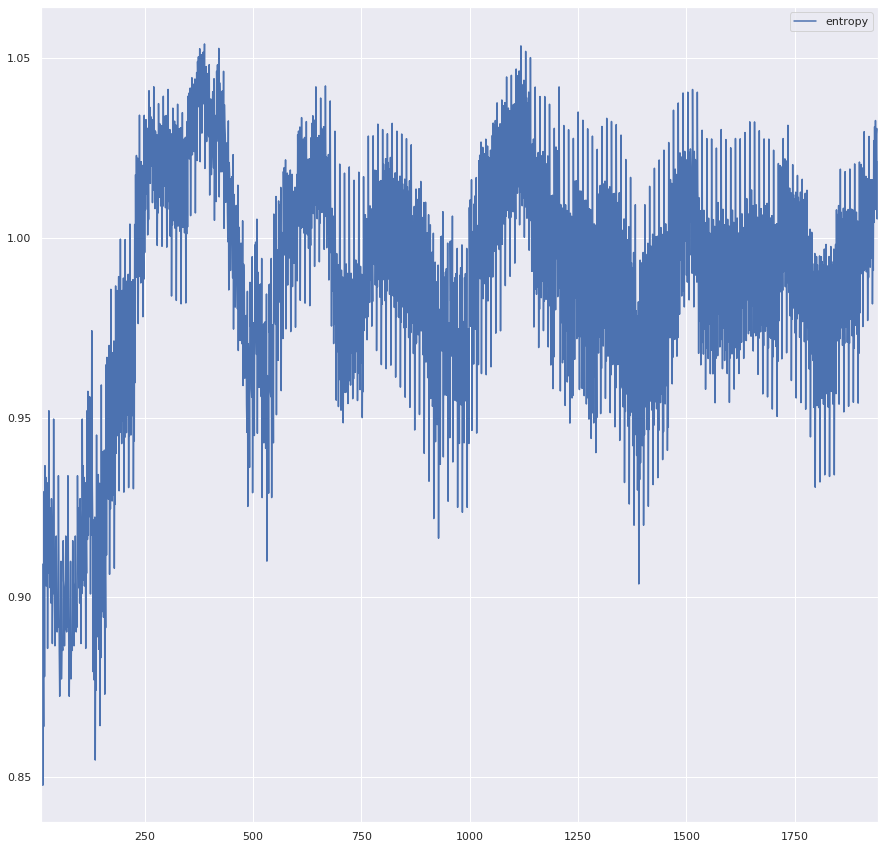

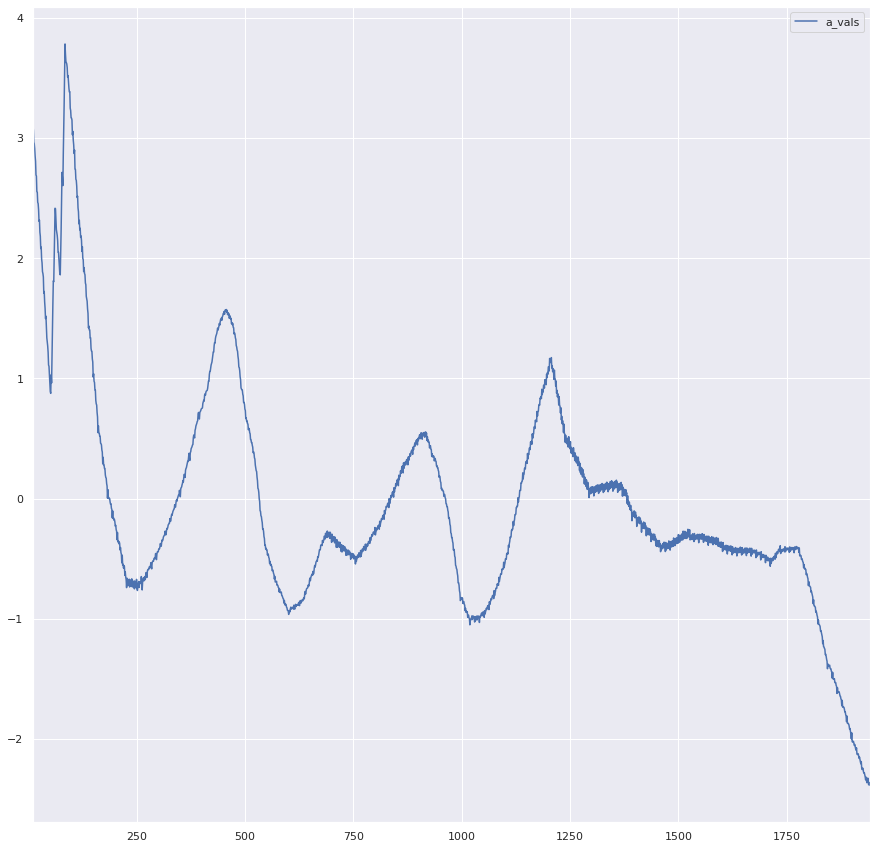

In [140]:
for col in df_2.columns:
    df_2.iloc[11:].plot(y=col, figsize=(15,15))

# DISTRIBUTION INFO

In [125]:
df_3 = pd.read_csv('../info/dist.txt', delimiter=",")
df_3.columns = ["dist"]
df_3["edc_0"] = df_3.dist.apply(lambda x: list(filter(lambda a: a is not "", x.split(" ")))[0][1:])
df_3["edc_1"] = df_3.dist.apply(lambda x: list(filter(lambda a: a is not "", x.split(" ")))[1])
df_3["edc_2"] = df_3.dist.apply(lambda x: list(filter(lambda a: a is not "", x.split(" ")))[2][:-1])

df_3.edc_0 = df_3.edc_0.astype("float64")
df_3.edc_1 = df_3.edc_1.astype("float64")
df_3.edc_2 = df_3.edc_2.astype("float64")

df_3 = df_3.drop(["dist"], axis=1)

df_3

,edc_0,edc_1,edc_2
0,0.263503,0.100792,0.635705
1,0.239089,0.087674,0.673237
2,0.253256,0.088860,0.657883
3,0.265504,0.102624,0.631873
4,0.223772,0.079048,0.697180
...,...,...,...
1939,0.297341,0.202377,0.500282
1940,0.290620,0.180697,0.528683
1941,0.298072,0.192068,0.509860
1942,0.297976,0.178824,0.523200


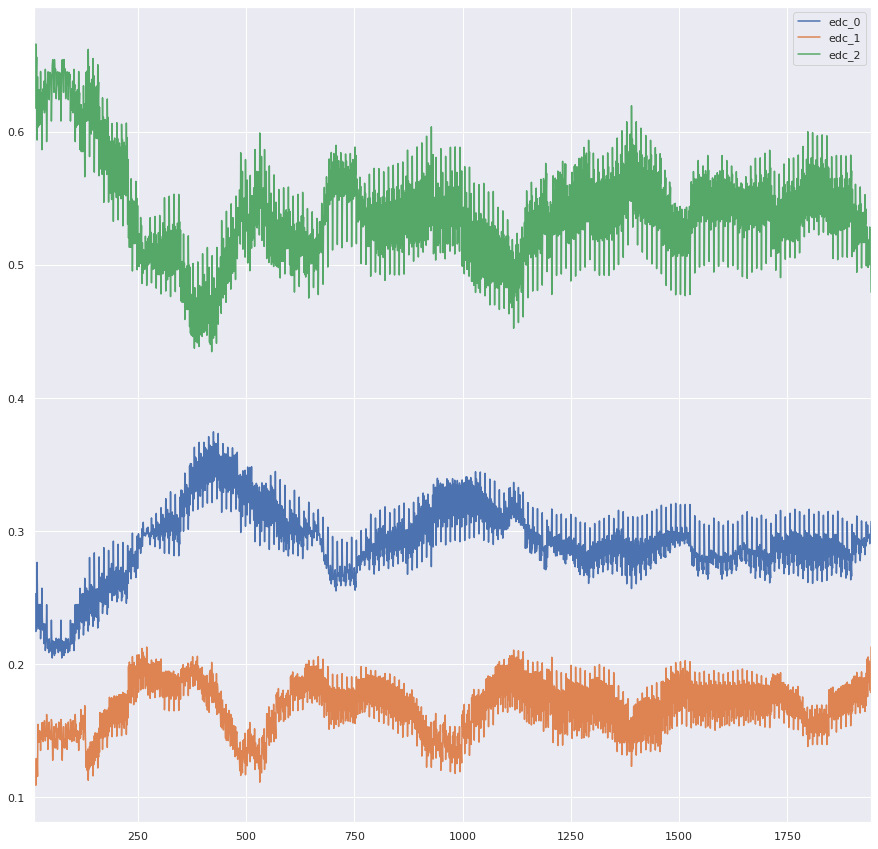

In [126]:
df_3.iloc[11:].plot(y=["edc_0","edc_1","edc_2"], figsize=(15,15))

# REWARD COMPUTATION

In [137]:
EPSILON = np.finfo(np.float32).eps
AVAILABILITY_PENALTY = 100

x = df[["util_0", "power_0", "dist_0",
        "util_1", "power_1", "dist_1",
        "util_2", "power_2", "dist_2"]].values
penalty = df["penalty"].values
rewards = []

for i in range(len(x)-1):
    power_consumption = x[i+1, 1::3]
    availability_term = AVAILABILITY_PENALTY * penalty[i]
    reward = -np.sum(np.power(power_consumption, 3)) - availability_term
    print(power_consumption, availability_term, reward)
    rewards.append(reward)

[-15.88219382 -15.88219382 -15.88219382] 0 12018.568140436737
[-15.88219382 -15.88219382 -15.88219382] 0 12018.568140436737
[-15.88219382 -15.88219382 -15.88219382] 0 12018.568140436737
[-15.88219382 -15.88219382 -15.88219382] 0 12018.568140436737
[-15.88219382 -15.88219382 -15.88219382] 0 12018.568140436737
[-15.88219382 -15.88219382 -15.88219382] 0 12018.568140436737
[-15.88219382 -15.88219382 -15.88219382] 0 12018.568140436737
[-15.88219382 -15.88219382 -15.88219382] 0 12018.568140436737
[-15.88219382 -15.88219382 -15.88219382] 0 12018.568140436737
[-2.69587577 -2.69587577 -2.69587577] 0 58.77882251946045
[-2.69587577 -2.69587577 -2.69587577] 0 58.77882251946045
[-2.69587577 -2.69587577 -2.69587577] 0 58.77882251946045
[-2.69587577 -2.69587577 -2.69587577] 0 58.77882251946045
[-2.69587577 -2.69587577 -2.69587577] 0 58.77882251946045
[-2.69587577 -2.69587577 -2.69587577] 0 58.77882251946045
[-2.69587577 -2.69587577 -2.69587577] 0 58.77882251946045
[-2.69587577 -2.69587577 -2.69587577

[-1.23776234 -1.94299156 -0.13044281] 0 9.233753522670021
[-1.23776234 -1.94299156 -0.13044281] 0 9.233753522670021
[-1.23776234 -1.94299156 -0.13044281] 0 9.233753522670021
[-1.23776234 -1.94299156 -0.13044281] 0 9.233753522670021
[-1.23776234 -1.94299156 -0.13044281] 0 9.233753522670021
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.23776234 -1.89104567 -0.13044281] 0 8.661021194978995
[-1.28970823 -1.84073145 -0.13044281] 0 8.384388411144105
[-1.28970823 -

[-0.79106232 -2.04259244 -0.84300822] 0 9.616196523282717
[-0.79106232 -2.04259244 -0.84300822] 0 9.616196523282717
[-0.79106232 -2.04259244 -0.84300822] 0 9.616196523282717
[-0.79106232 -2.04259244 -0.84300822] 0 9.616196523282717
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.73911643 -2.04259244 -0.79106232] 0 9.420876107401586
[-0.68880221 -2.04259244 -0.79106232] 0 9.343903066468876
[-0.68880221 -2.04259244 -0.79106232] 0 9.343903066468876
[-0.68880221 -

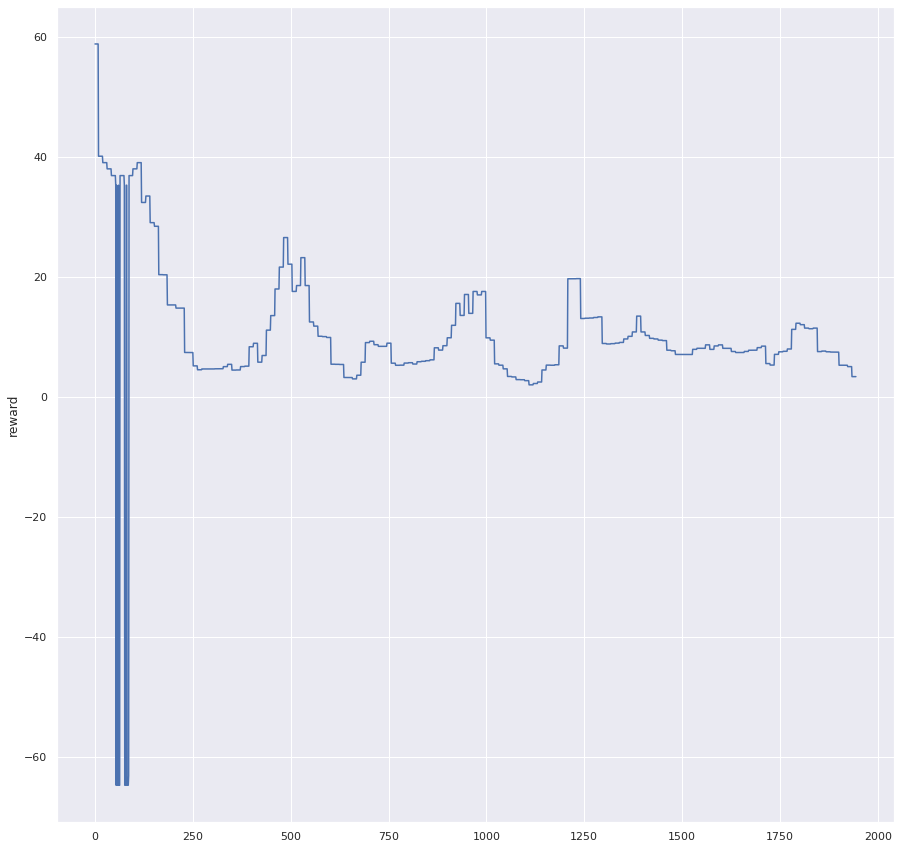

In [138]:
plt.figure(figsize=(15,15))
plt.plot(rewards[11:])
plt.ylabel('reward')
plt.show()

# Episodes: Loss, Mean Reward, etc.

In [91]:
! ls ../info

dist.txt		       vanilla_A2C_training_results.csv
mercury_info_parsed	       vanilla_a3c_training_info.txt
train_arrays.txt	       vanilla_a3c_training_results.csv
vanilla_A2C_training_info.txt


In [96]:
df_4 = pd.read_csv('../info/vanilla_a3c_training_results.csv', delimiter=";")
df_4.columns = ["episodes", "length", "rewards", "loss", "entropies"]
df_4

,episodes,length,rewards,loss,entropies
0,0,845,5514.554547,2.651906,-0.000323
1,0,53,337.282238,2.779287,-0.000324
2,0,53,338.902053,2.721387,-0.000324
3,0,801,5235.189474,2.686518,-0.000324
4,0,911,5963.376432,2.573598,-0.000324
5,0,943,6132.319466,2.582741,-0.000324
6,0,2098,-2952.298104,0.290340,-0.000107


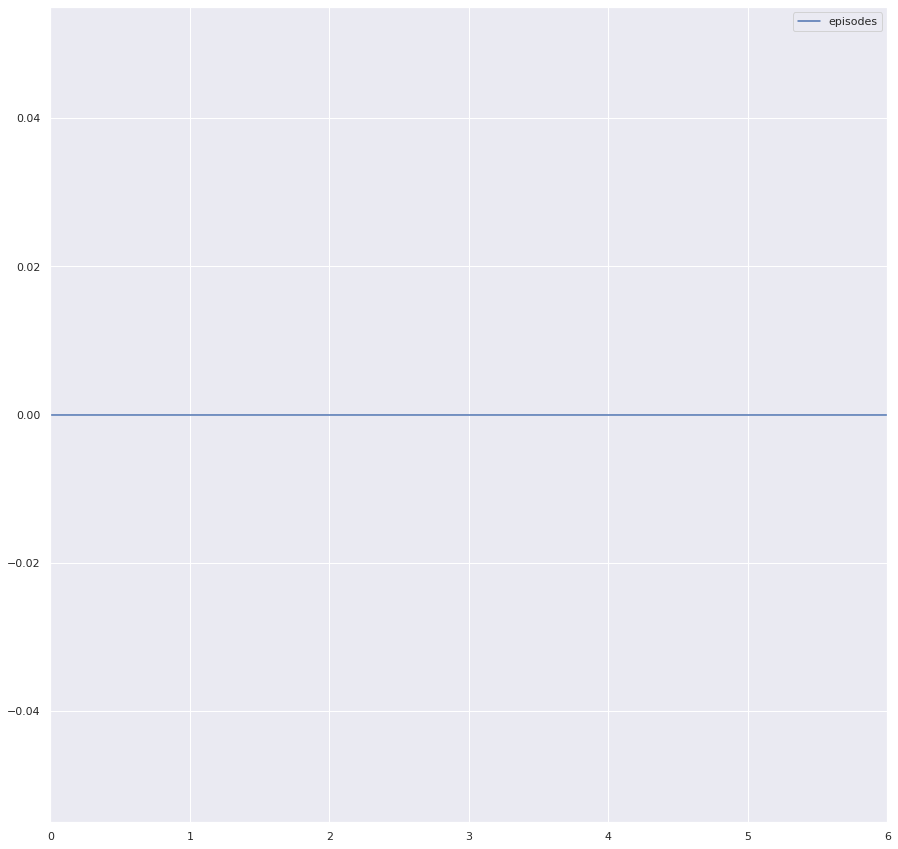

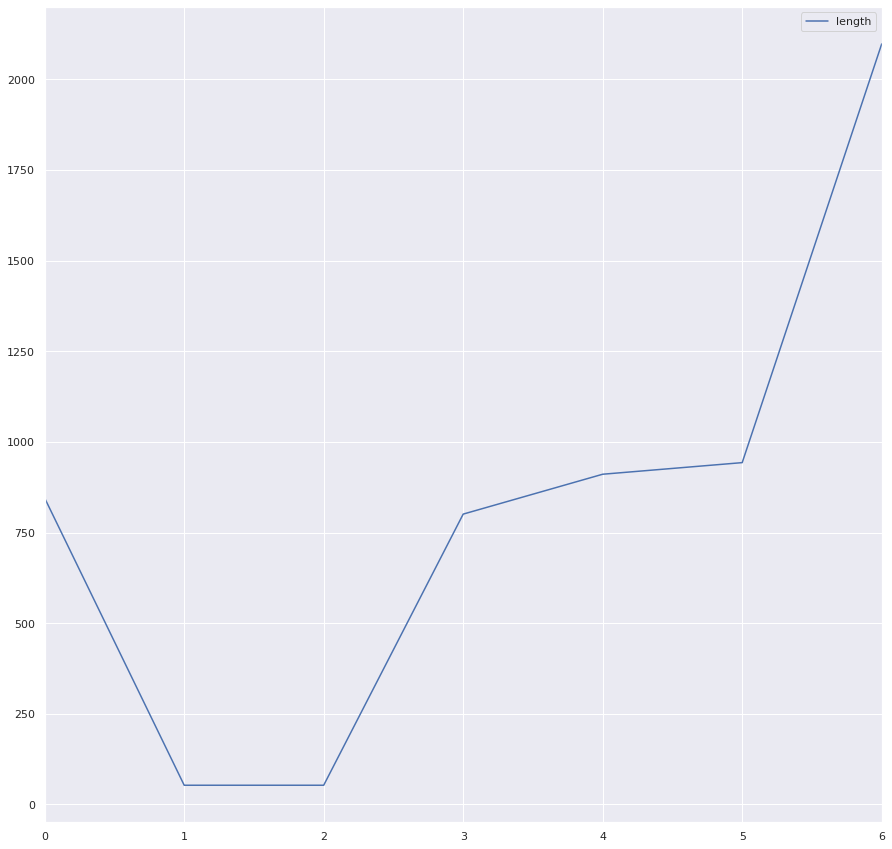

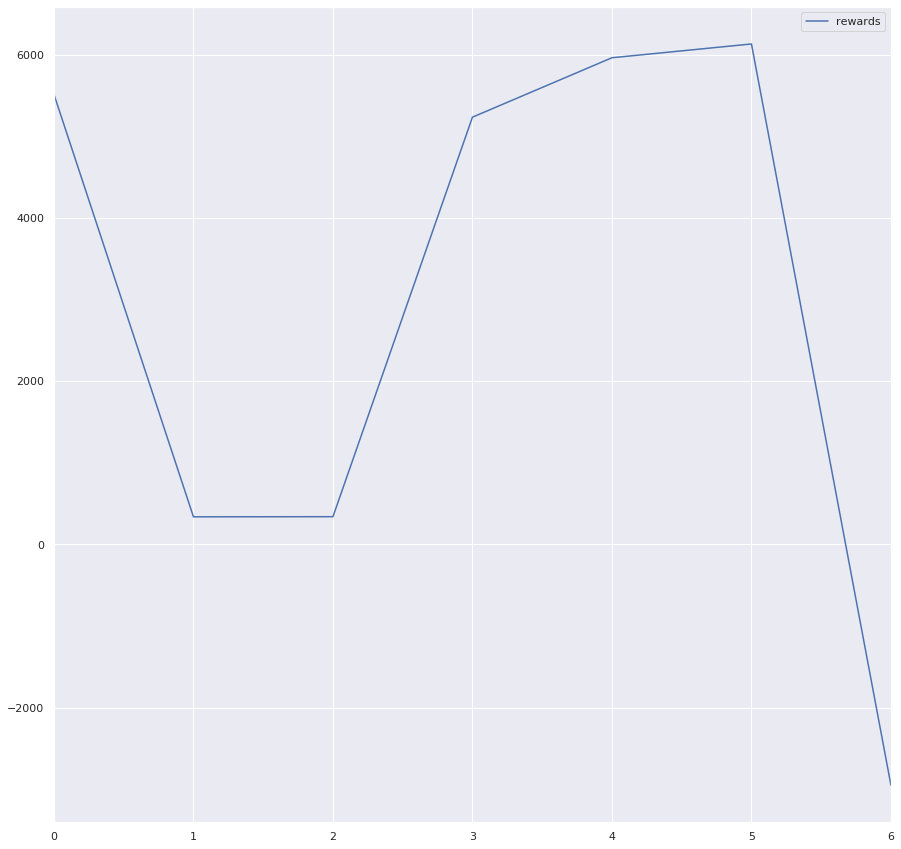

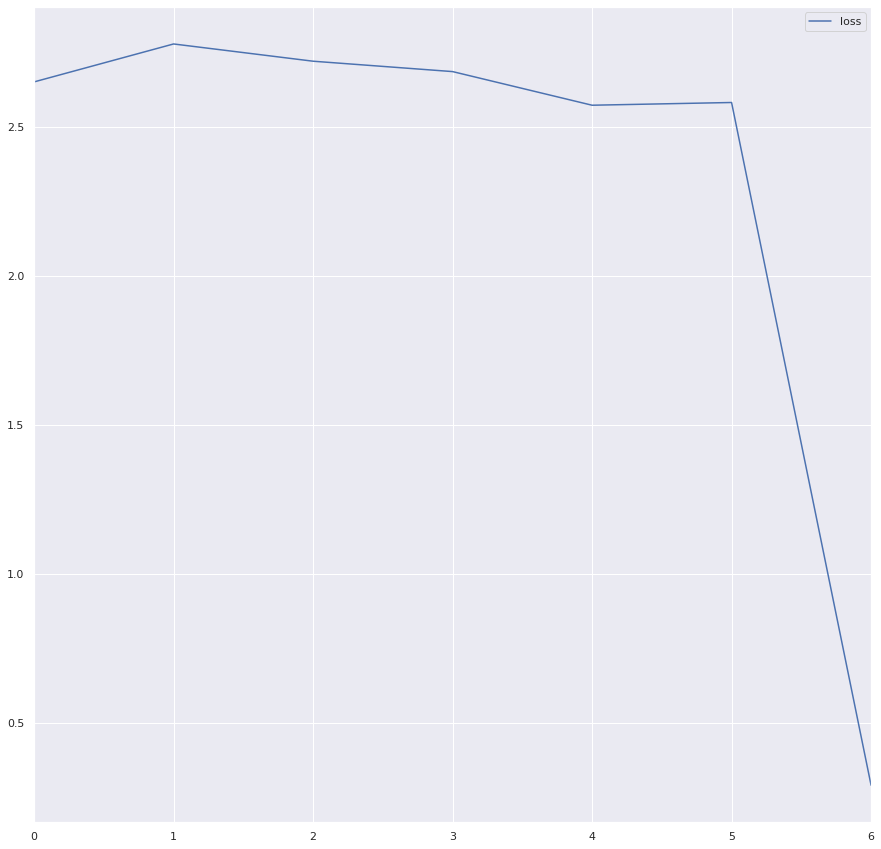

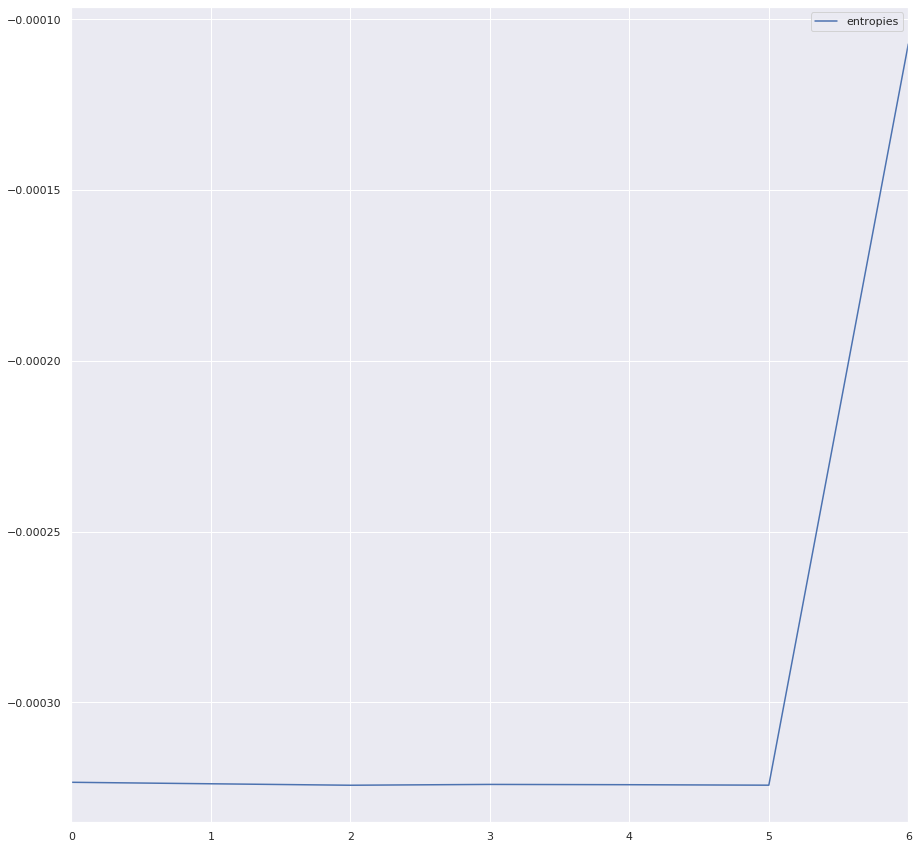

In [98]:
for col in df_4.columns:
    df_4.plot(y=col, figsize=(15,15))